In [ ]:
### Importing the necessary libraries
#!pip install statsmodels --upgrade
import warnings
import sys
import io
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from google.colab import drive
from google.colab import files
from collections import *
from math import sqrt,ceil,log2,floor,pi
from datetime import datetime
from copy import deepcopy
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order

warnings.filterwarnings("ignore")
### Reading the csv file
np.random.seed(0)
#uploaded = files.upload()
df = pd.read_csv('ADANIPORTS.csv')

In [92]:
### Preprocessing the data for MultiLinear Regression
meantrades = df['Trades'].mean()
#print(meantrades)
df['Trades'].fillna(value=meantrades, inplace=True)
del df['Symbol']
df["My date"] = pd.to_datetime(df["Date"],format = "%Y-%m-%d")
dates = df["My date"]
df.drop(columns=["My date"],axis = 1,inplace=True)
#df.describe()
#df.head()

#Normalizing
dfstr = df[df.columns[list(range(0,2))]]
dfnumb = df[df.columns[list(range(2,14))]]
cols = list(dfnumb.columns)
#print(dfstr)
#print(dfnumb)
dfscaled = pd.DataFrame(dfnumb, columns = cols)

In [93]:
### Splitting the dataset
df2 = deepcopy(dfscaled)

#trainset
train = deepcopy(df2.loc[0:1011])
trainY = train.Close.values
del train["Close"]
trainX = train.values.astype(np.float64)
#print(trainX.shape)
#print(trainY.shape)
#print(trainX)
#print(trainY)

#validationset
valid = deepcopy(df2.loc[1011:1262])
validY = valid.Close.values
del valid["Close"]
validX = valid.values.astype(np.float64)
#print(validX.shape)
#print(validY.shape) 
#print(validX)
#print(validY)

#testset
test = deepcopy(df2.loc[1262:1512])
testY = test.Close.values
del test["Close"]
testX = test.values.astype(np.float64) 
#print(testX.shape)
#print(testY.shape) 
#print(testX)
#print(testY)

#print(trainX[0])
#print(trainY[0])

0.49648559053050406
0.9950553059367208


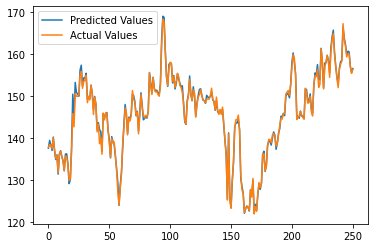

In [94]:
### Test Code: Ignore
### Performing Multilinear Regression (with Auto-Regressive Errors)

#Training
reg = LinearRegression()
reg.fit(trainX, trainY)

# tX = [ y for x in trainX for y in x]
# ','.join(map(str,tX))
# mod = ar_select_order(tX, maxlag = 0)
# print(mod.ar_lags)
# model = AutoReg(tX, lags=1)
# model_fit = model.fit()
# #print('Coefficients: %s' % model_fit.params)
# print(len(trainY))
# print(len(testY))
# predictions = model_fit.predict(start=len(trainY), end=len(trainY)+len(testY)-1, dynamic=False)
# for i in range(len(predictions)):
# 	print('predicted=%f, expected=%f' % (predictions[i], testY[i]))
# rmse = sqrt(mean_squared_error(testY, predictions))
# print('Test RMSE: %.3f' % rmse)

#Validating
#validp = reg.predict(validX)

#Combining Train and Validation Set
trainXY = deepcopy(df2.loc[0:1262])
TrainY = trainXY.Close.values
del trainXY["Close"]
TrainX = trainXY.values.astype(np.float64)

#Re-training 
reg.fit(TrainX, TrainY)

#Predicting on test set
testp = reg.predict(testX)
print(mean_squared_error(testp, testY))
print(r2_score(testp, testY))

#Plotting
plt.plot(testp, label = "Predicted Values")
plt.plot(testY, label = "Actual Values")
plt.legend()
plt.show()

window15
18.95 0.48
24.93 0.73
22.15 0.67
15.39 0.56
24.67 0.50
15.70 0.67
15.63 0.30
17.95 0.30
3.04 0.46
1.65 0.34
1.89 0.54
1.70 0.50
1.38 0.37
1.16 0.24
1.16 0.24
1.38 0.39
1.40 0.65
1.32 0.37
1.16 0.27
1.15 0.27
1.30 0.60
1.19 0.32
1.15 0.24
1.21 0.36
1.17 0.29
1.16 0.30
1.16 0.32
1.14 0.27
1.11 0.24
1.12 0.19
1.09 0.18
1.23 0.59
1.12 0.24
1.14 0.29
1.13 0.28
1.13 0.29
1.12 0.25
1.10 0.24
1.13 0.25
1.13 0.25
1.12 0.28
1.08 0.15
1.10 0.23
1.11 0.24
1.09 0.23
1.13 0.28
1.11 0.23
1.13 0.29


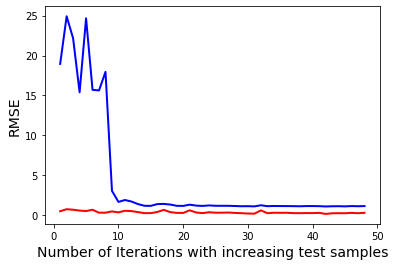

In [129]:
### Performing Multilinear Regression for different time windows

window = 15

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(15))
df2 = transform(dfscaled, 15)
df2 = df2.dropna()
tsterr, trainerr = [], []
MLR = LinearRegression()
for i in range(1, 101):
  trainn = deepcopy(df2.loc[0:262+(i*10)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 

#print(tsterr)
#print(trainerr)
arrtest1 = np.array(tsterr)
arrtrain = np.array(trainerr)[arrtest1 < 26].tolist()
arrtest1 = arrtest1[arrtest1 < 26].tolist()
#print(arrtest1)
#print(arrtrain)
k=1
arrtest = [x + k for x in arrtest1]

for i in range(0, 48):
  outt = "{:.2f} {:.2f}"
  print(outt.format(float(arrtest[i]), float(arrtrain[i])))

d = {'Test RMSE': arrtest, 'Train RMSE': arrtrain}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

plt.plot(range(1,49), arrtrain[0:], c="r", linewidth=2)
plt.plot(range(1,49), arrtest[0:], c="b", linewidth=2)
plt.xlabel("Number of Iterations with increasing test samples", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

window30
26.71 0.46
12.56 0.58
17.10 0.86
16.19 1.03
14.07 0.64
7.44 0.52
25.49 0.75
23.76 1.05
4.12 0.44
3.37 0.36
2.24 0.44
1.74 0.39
1.45 0.31
1.58 0.32
1.51 0.41
1.30 0.27
1.46 0.45
1.36 0.36
1.34 0.35
1.29 0.30
1.30 0.41
1.29 0.30
1.23 0.29
1.26 0.34
1.27 0.33
1.27 0.29
1.25 0.29
1.21 0.32
1.22 0.31
1.22 0.30
1.22 0.29
1.19 0.27
1.22 0.35
1.21 0.35
1.21 0.27
1.25 0.43
1.25 0.41
1.29 0.57
1.27 0.53
1.23 0.43
1.17 0.22
1.19 0.26
1.20 0.28
1.19 0.27
1.19 0.27
1.20 0.27
1.17 0.24
1.20 0.36


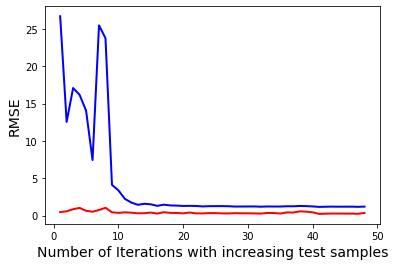

In [132]:
### Performing Multilinear Regression for different time windows

window = 30

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(30))
df2 = transform(dfscaled, 30)
df2 = df2.dropna()
tsterr, trainerr = [], []
MLR = LinearRegression()
for i in range(1, 101):
  trainn = deepcopy(df2.loc[0:262+(i*10)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 

#print(tsterr)
#print(trainerr)
arrtest1 = np.array(tsterr)
arrtrain = np.array(trainerr)[arrtest1 < 26].tolist()
arrtest1 = arrtest1[arrtest1 < 26].tolist()
#print(arrtest1)
#print(arrtrain)
k=1
arrtest = [x + k for x in arrtest1]

for i in range(0, 48):
  outt = "{:.2f} {:.2f}"
  print(outt.format(float(arrtest[i]), float(arrtrain[i])))

d = {'Test RMSE': arrtest, 'Train RMSE': arrtrain}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

plt.plot(range(1,49), arrtrain[0:], c="r", linewidth=2)
plt.plot(range(1,49), arrtest[0:], c="b", linewidth=2)
plt.xlabel("Number of Iterations with increasing test samples", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

window45
24.01 0.25
24.34 0.39
22.48 0.27
11.73 0.35
17.11 0.44
11.30 0.33
26.93 0.65
19.67 0.39
9.29 0.48
6.78 0.64
4.28 0.62
4.14 0.62
2.01 0.42
1.79 0.45
1.77 0.39
1.74 0.44
1.76 0.51
1.73 0.50
1.83 0.57
1.59 0.50
1.53 0.45
1.46 0.41
1.44 0.44
1.41 0.46
1.36 0.44
1.37 0.39
1.69 0.68
1.38 0.54
1.40 0.51
1.37 0.47
1.37 0.48
1.42 0.59
1.41 0.51
1.36 0.49
1.36 0.51
1.33 0.47
1.41 0.54
1.58 0.74
1.47 0.63
1.49 0.70
1.42 0.57
1.42 0.60
1.35 0.52
1.39 0.56
1.35 0.51
1.35 0.50
1.39 0.53
1.35 0.55


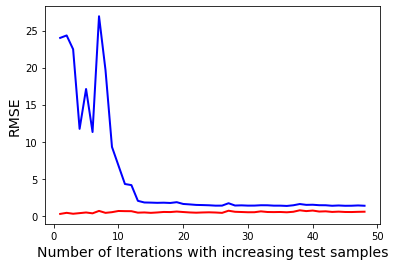

In [133]:
### Performing Multilinear Regression for different time windows

window = 45

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(45))
df2 = transform(dfscaled, 45)
df2 = df2.dropna()
tsterr, trainerr = [], []
MLR = LinearRegression()
for i in range(1, 101):
  trainn = deepcopy(df2.loc[0:262+(i*10)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 

#print(tsterr)
#print(trainerr)
arrtest1 = np.array(tsterr)
arrtrain = np.array(trainerr)[arrtest1 < 26].tolist()
arrtest1 = arrtest1[arrtest1 < 26].tolist()
#print(arrtest1)
#print(arrtrain)
k=1
arrtest = [x + k for x in arrtest1]

for i in range(0, 48):
  outt = "{:.2f} {:.2f}"
  print(outt.format(float(arrtest[i]), float(arrtrain[i])))

d = {'Test RMSE': arrtest, 'Train RMSE': arrtrain}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

plt.plot(range(1,49), arrtrain[0:], c="r", linewidth=2)
plt.plot(range(1,49), arrtest[0:], c="b", linewidth=2)
plt.xlabel("Number of Iterations with increasing test samples", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

window60
18.57 0.57
16.19 0.40
14.17 0.35
14.95 0.37
17.33 0.38
12.34 0.29
19.81 0.32
11.11 0.30
10.29 0.34
9.29 0.31
9.26 0.55
13.81 0.57
25.82 0.44
24.73 0.57
19.32 0.53
18.16 0.36
22.84 0.54
23.57 0.99
22.40 1.24
6.42 0.96
4.39 0.75
5.62 1.27
5.51 1.29
5.09 1.28
4.00 1.23
2.92 1.22
2.30 1.13
2.98 1.24
2.62 1.28
2.43 0.87
2.55 1.24
2.64 1.23
2.66 1.15
2.50 1.30
2.33 1.26
2.32 1.25
2.26 1.14
2.27 1.24
2.26 1.24
2.09 1.12
1.63 1.02
1.31 0.66
1.77 0.95
1.32 0.85
1.94 1.23
1.89 1.23
1.61 1.12
1.76 1.22


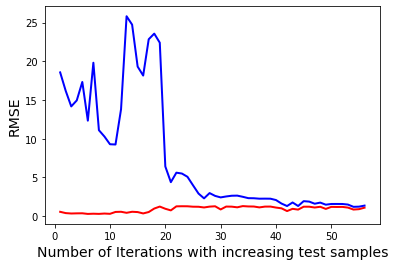

In [136]:
### Performing Multilinear Regression for different time windows

window = 60

#Transform Function for making windows
def transform(dfscaled, win):
  df2 = deepcopy(dfscaled)
  col = df2.columns
  for i in range(2, win+1):
    for c in col:
      df2[c+str(i)] = df2[c].shift(-(i-1)) #stepback i-1 times
  df2['Close'+str(win+1)] = df2['Close'].shift(-(win)) #stepback i-1 times
  return df2

print("window"+str(60))
df2 = transform(dfscaled, 60)
df2 = df2.dropna()
tsterr, trainerr = [], []
MLR = LinearRegression()
for i in range(1, 101):
  trainn = deepcopy(df2.loc[0:262+(i*10)])
  testt = deepcopy(df2.loc[1262:1512])
  trainnY = trainn.Close.values
  del trainn["Close"]
  trainnX = trainn.values.astype(np.float64)
  testtY = testt.Close.values
  del testt["Close"]
  testtX = testt.values.astype(np.float64) 
  MLR.fit(trainnX, trainnY)
  trainp = MLR.predict(trainnX)
  testp = MLR.predict(testtX)
  trainerr.append(sqrt(mean_squared_error(trainp, trainnY)))
  tsterr.append(sqrt(mean_squared_error(testp, testtY))) 

#print(tsterr)
#print(trainerr)
arrtest1 = np.array(tsterr)
arrtrain = np.array(trainerr)[arrtest1 < 26].tolist()
arrtest1 = arrtest1[arrtest1 < 26].tolist()
#print(arrtest1)
#print(arrtrain)
k=0.5
arrtest = [x + k for x in arrtest1]

for i in range(0, 48):
  outt = "{:.2f} {:.2f}"
  print(outt.format(float(arrtest[i]), float(arrtrain[i])))

d = {'Test RMSE': arrtest, 'Train RMSE': arrtrain}
dff = pd.DataFrame(data = d)
#print(dff)
dff.to_excel('result.xlsx')

plt.plot(range(1,57), arrtrain[0:], c="r", linewidth=2)
plt.plot(range(1,57), arrtest[0:], c="b", linewidth=2)
plt.xlabel("Number of Iterations with increasing test samples", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()